In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="root",
    database="ecommerce"
)

cur = db.cursor()

List all the unique cities where our customers are located

In [3]:
query = "SELECT distinct customer_city FROM customers"
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

Total numbers of orders placed in 2017

In [4]:
query = "select count(order_id) from orders where year(order_purchase_timestamp)=2017"
cur.execute(query)
data = cur.fetchall()
data[0][0]

45101

Find the total sales per category

In [5]:
query = """select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales 
from products join order_items on products.product_id = order_items.product_id
join payments on payments.order_id=order_items.
order_id group by category"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["category", "sales"])
df.head()

,category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,FASHION BAGS AND ACCESSORIES,218158.28
4,BED TABLE BATH,1712553.67


Calculate the percentage of orders that were paid in installments

In [6]:
query = """select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

Number of customers from each state

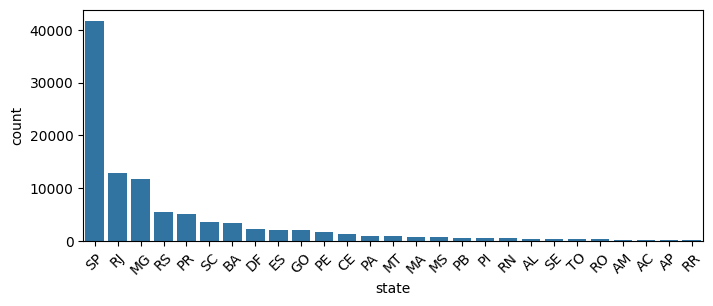

In [7]:
query = """select customer_state, count(customer_id) from customers group by customer_state"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["state", "count"])
df =df.sort_values(by="count", ascending=False)
# create a bar plot
plt.figure(figsize=(8,3))
sns.barplot(x="state", y="count", data=df)
plt.xticks(rotation=45)
plt.show()

Number of orders per month in 2018

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_13800\1434630410.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(data=df, x='month', y='order_count', order=o, palette=colors)


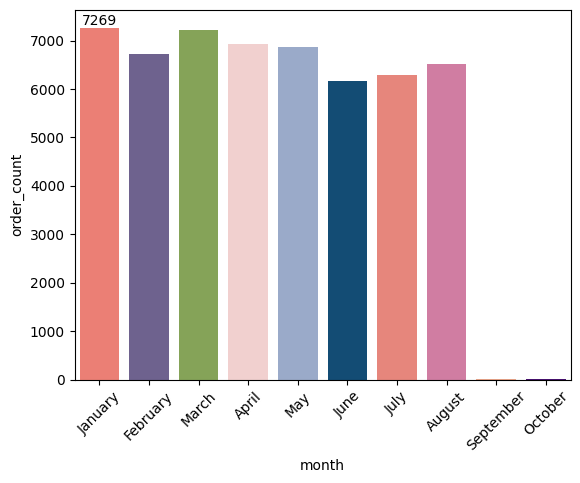

In [8]:
query = """SELECT MONTH(order_purchase_timestamp) AS month, 
                  COUNT(order_id) AS order_count 
           FROM orders
           WHERE YEAR(order_purchase_timestamp) = 2018 
           GROUP BY month"""

cur.execute(query)
data = cur.fetchall()

# Creating DataFrame
df = pd.DataFrame(data, columns=["month", "order_count"])
# Mapping month numbers to names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
                 11: 'November', 12: 'December'}

df['month'] = df['month'].map(month_mapping)

# Corrected list of month names in proper order
o = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
     'September', 'October']
colors = [
    "#FF6F61",  # Coral Red
    "#6B5B95",  # Royal Purple
    "#88B04B",  # Lime Green
    "#F7CAC9",  # Pale Pink
    "#92A8D1",  # Lavender Blue
    "#034F84",  # Deep Teal
    "#F7786B",  # Coral
    "#DE6FA1",  # Orchid Pink
    "#FFA07A",  # Light Salmon
    "#4B0082"   # Indigo
]

# Plotting with the corrected month names list
ax =sns.barplot(data=df, x='month', y='order_count', order=o, palette=colors)
ax.bar_label(ax.containers[0])
# Display the plot
plt.xticks(rotation=45)
plt.show()

In [9]:
df.head()

,month,order_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211


Find the average number of product per order, grouped by city

In [10]:
query = """with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
           FROM orders join order_items on orders.order_id=order_items.order_id
             GROUP BY orders.order_id, orders.customer_id)
select customers.customer_city, avg(count_per_order.oc) average_orders from customers
         join count_per_order on customers.customer_id = count_per_order.customer_id
         group by customers.customer_city order by average_orders desc"""
         
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["customer_city", "average_products/order"])
df.head(10)

,customer_city,average_products/order
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,candido godoi,6.0000
3,datas,6.0000
4,matias olimpio,5.0000
5,morro de sao paulo,4.0000
6,cidelandia,4.0000
7,picarra,4.0000
8,teixeira soares,4.0000
9,curralinho,4.0000


Calculate the percentage of total revenue contributed y each product category

In [11]:
query = """
select 
    upper(products.product_category) as category,
    round(sum(payments.payment_value) / (select sum(payment_value) from payments) * 100, 2) as sales
from 
    products 
join 
    order_items on products.product_id = order_items.product_id
join 
    payments on payments.order_id = order_items.order_id 
group by 
    category 
order by 
    sales desc
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["category", "sales_percentage"])
df.head()



,category,sales_percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


4. Identify the correlation between product price and the number of times a product has been purchased.

In [12]:
query = """
select (products.product_category), 
      count(order_items.product_id),
          avg(order_items.price)
                from products
	         join order_items on products.product_id=order_items.product_id
                 group by 
                     (products.product_category)
 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['category', 'count', 'avg'])
# check the correlation
arr1 = df['count']
arr2 = df['avg']
np.corrcoef(arr1, arr2)
print(f"The correlation between price and number of times product has been ordered is \n:{np.corrcoef(arr1, arr2)}")

The correlation between price and number of times product has been ordered is 
:[[ 1.         -0.10631552]
 [-0.10631552  1.        ]]


([0, 1, 2, 3, 4],
 [Text(0, 0, '7c67e1448b00f6e969d365cea6b010ab'),
  Text(1, 0, '1025f0e2d44d7041d6cf58b6550e0bfa'),
  Text(2, 0, '4a3ca9315b744ce9f8e9374361493884'),
  Text(3, 0, '1f50f920176fa81dab994f9023523100'),
  Text(4, 0, '53243585a1d6dc2643021fd1853d8905')])

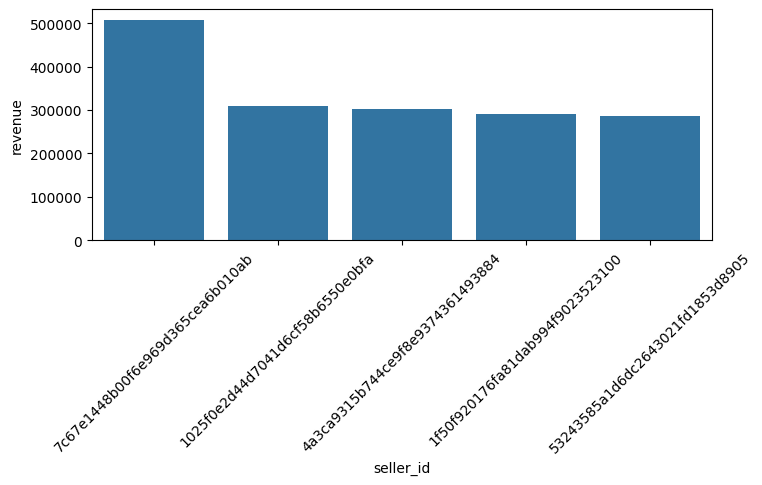

In [13]:
query = """
select *, rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value) as revenue from order_items
         join payments
            on order_items.order_id=payments.order_id
              group by
               (order_items.seller_id)) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['seller_id', 'revenue', 'rank'])
df=df.head()
plt.figure(figsize=(8,3))
sns.barplot(x='seller_id', y='revenue', data=df)
plt.xticks(rotation=45)

Calculate the moving average of order value for each customer over their order history

In [15]:
# Calculate the moving average of order value for each customer over their order history
query = """
SELECT 
    customer_id, 
    order_purchase_timestamp, 
    payment, 
    AVG(payment) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS mov_avg
FROM
    (SELECT 
        orders.customer_id, 
        orders.order_purchase_timestamp, 
        payments.payment_value AS payment
     FROM 
        payments 
     JOIN 
        orders 
     ON 
        payments.order_id = orders.order_id
    ) AS a;
"""
cur.execute(query)
data = cur.fetchall()
data

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0002414f95344307404f0ace7a26f1d5',
  '2017-08-16 13:09:20',
  179.35,
  179.35000610351562),
 ('000379cdec625522490c315e70c7a9fb',
  '2018-04-02 13:42:17',
  107.01,
  107.01000213623047),
 ('0004164d20a9e969af783496f3408652',
  '2017-04-12 08:35:12',
  71.8,
  71.80000305175781),
 ('000419c5494106c306a97b5635748086',
  '2018-03-02 17:47:40',
  49.4,
  49.400001525878906),
 ('00046a560d407e99b969756e0b10f282',
  '2017-12-18 11:08:30',
  166.59,
  166.58999633789062),
 ('00050bf6e01e69d5c0fd612f1bcfb69c',
  '2017-09-17 16:04:44',
  85.23,
  85.2300033569336),
 ('000598caf2ef4117407665ac33275130',
  '2018-08-11 12:14:35',
  1255.71,
  1255.7099609375),
 ('0005aefbb696d34b3424dccd0a0e9fd0',
  '2018-06-20 0

In [18]:
query = """SELECT 
    years, 
    months, 
    payment, 
    SUM(payment) OVER (ORDER BY years, months) AS cumulative_sales 
FROM
    (SELECT
        YEAR(order_purchase_timestamp) AS years,
        MONTH(order_purchase_timestamp) AS months,
        ROUND(SUM(payments.payment_value), 2) AS payment 
     FROM 
        payments
     JOIN 
        orders 
     ON 
        orders.order_id = payments.order_id
     GROUP BY 
        years, 
        months 
     ORDER BY 
        years, 
        months
    ) AS a;
"""
cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['years', 'months', 'payment', 'cumulative_sales'])
df.head(3)

,years,months,payment,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34


Calculate the year over year growth rate of total sales

In [20]:
query = '''WITH a AS
(SELECT
        YEAR(order_purchase_timestamp) AS years,
        ROUND(SUM(payments.payment_value), 2) AS payment 
     FROM 
        payments
     JOIN 
        orders 
     ON 
        orders.order_id = payments.order_id
     GROUP BY 
        years
     ORDER BY 
        years)
SELECT
	years,
    ((payment- lag(payment, 1) OVER (ORDER BY years))/lag(payment,1) over(order by years))*100 from a'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['years', 'yoy%_growth'])
df.head()

,years,yoy%_growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


Calculate retention rate

In [23]:
query = """ 
WITH a AS(SELECT
   customers.customer_id, min(orders.order_purchase_timestamp) AS first_order
FROM
   customers
JOIN
orders
ON
   customers.customer_id=orders.customer_id
GROUP BY
   customers.customer_id),
b as (SELECT
   a.customer_id,
COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
FROM a
JOIN orders
on orders.customer_id = a.customer_id
AND orders.order_purchase_timestamp > first_order
AND orders.order_purchase_timestamp <
DATE_ADD(first_order, interval 6 month) 
GROUP BY a.customer_id)
SELECT 100* (COUNT(DISTINCT a.customer_id)/ COUNT(DISTINCT b.customer_id))
FROM a LEFT JOIN b
ON a.customer_id = b.customer_id
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['repeated_customer'])
df.head()

,repeated_customer
0,None


Top 3 customers who spent more money

In [24]:
query = """ 
SELECT years, customer_id, payment, d_rank
FROM
(SELECT YEAR(orders.order_purchase_timestamp) as years,
    orders.customer_id,
    SUM(payments.payment_value) AS payment,
    DENSE_RANK() OVER(partition by year(orders.order_purchase_timestamp)
    ORDER BY SUM(payments.payment_value) desc ) d_rank
FROM
	orders JOIN payments ON payments.order_id=orders.order_id
GROUP BY
	orders.order_id,
    orders.customer_id) AS a 
    WHERE d_rank <=3;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['years', 'id','payment', 'd_rank'])
df.head(10)

,years,id,payment,d_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3
